### Import libraries


In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

### Read Data


In [2]:
# Create filepath and display DF

ibm_data = "emp_attrition.csv"
hr_df = pd.read_csv(ibm_data)

hr_df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


### Initial Analysis
- Any missing elements that need to be fixed
- Fix data issues


In [3]:
# determine data types by column

hr_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [4]:
# check for null values

hr_df.isnull().values.any()

False

In [5]:
# check for null values

hr_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
# check for null values

hr_df.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# count of unique values in each column
hr_df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

### Exploratory Phase
- Get data statistics 
- Visualize the data

In [8]:
# get df stats

hr_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
# see all the columns with descriptive stats

pd.set_option('display.max_columns', None)
hr_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
# random sample of the df

hr_df.sample(7)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
666,22,Yes,Travel_Rarely,617,Research & Development,3,1,Life Sciences,1,926,2,Female,34,3,2,Manufacturing Director,3,Married,4171,10022,0,Y,Yes,19,3,1,80,1,4,3,4,3,2,0,2
941,30,No,Travel_Rarely,1138,Research & Development,6,3,Technical Degree,1,1311,1,Female,48,2,2,Laboratory Technician,4,Married,4627,23631,0,Y,No,12,3,1,80,1,10,6,3,9,2,6,7
1389,31,No,Travel_Frequently,1125,Research & Development,1,3,Life Sciences,1,1956,4,Male,48,1,2,Research Scientist,1,Married,5003,5771,1,Y,No,21,4,2,80,0,10,6,3,10,8,8,7
686,41,No,Travel_Rarely,263,Research & Development,6,3,Medical,1,957,4,Male,59,3,1,Laboratory Technician,1,Single,4721,3119,2,Y,Yes,13,3,3,80,0,20,3,3,18,13,2,17
446,41,No,Non-Travel,267,Sales,10,2,Life Sciences,1,599,4,Male,56,3,2,Sales Executive,4,Single,6230,13430,7,Y,No,14,3,4,80,0,16,3,3,14,3,1,10
235,43,No,Travel_Rarely,1034,Sales,16,3,Marketing,1,327,4,Female,80,3,4,Manager,4,Married,16064,7744,5,Y,Yes,22,4,3,80,1,22,3,3,17,13,1,9
314,39,No,Travel_Rarely,117,Research & Development,10,1,Medical,1,429,3,Male,99,3,4,Manager,1,Married,17068,5355,1,Y,Yes,14,3,4,80,0,21,3,3,21,9,11,10


<AxesSubplot:xlabel='Education', ylabel='DailyRate'>

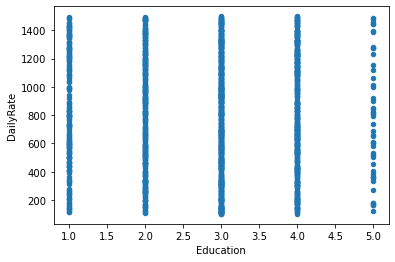

In [11]:
# look at running_time vs runtime using a scatter plot

hr_df.plot(x='Education', y='DailyRate', kind='scatter')

In [12]:
hr_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [21]:
hr_df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='ticks', color_codes = True)

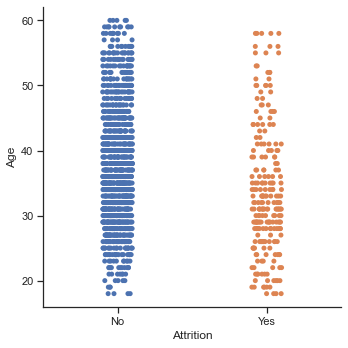

In [23]:
sns.catplot(x = 'Attrition', y = 'Age', order = ['No', 'Yes'], data=hr_df)

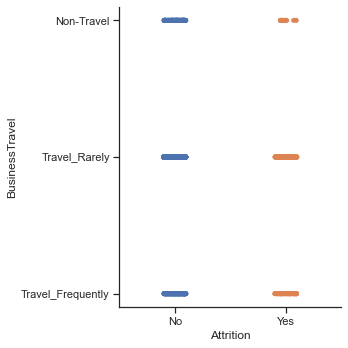

In [24]:
sns.catplot(x = 'Attrition', y = 'BusinessTravel', order = ['No', 'Yes'], data=hr_df)

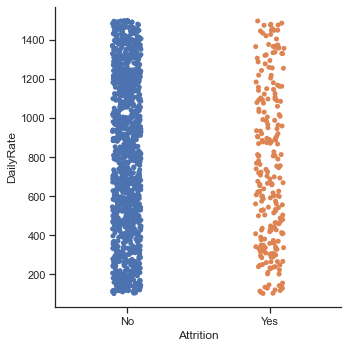

In [25]:
sns.catplot(x = 'Attrition', y = 'DailyRate', order = ['No', 'Yes'], data=hr_df)

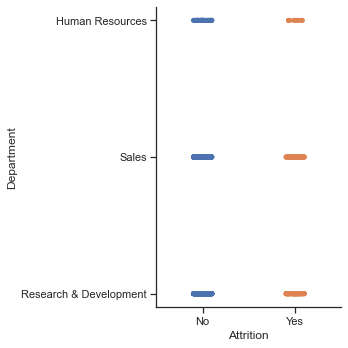

In [26]:
sns.catplot(x = 'Attrition', y = 'Department', order = ['No', 'Yes'], data=hr_df)

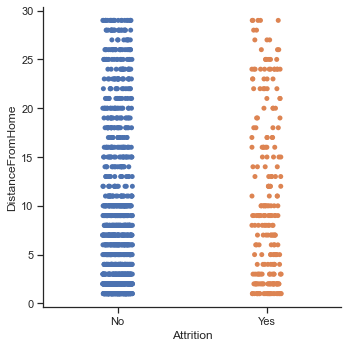

In [27]:
sns.catplot(x = 'Attrition', y = 'DistanceFromHome', order = ['No', 'Yes'], data=hr_df)

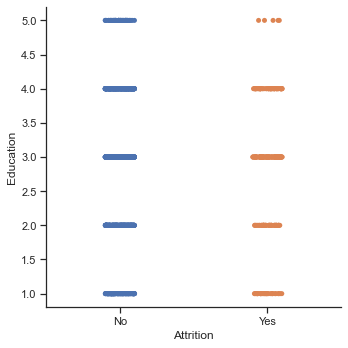

In [28]:
sns.catplot(x = 'Attrition', y = 'Education', order = ['No', 'Yes'], data=hr_df)

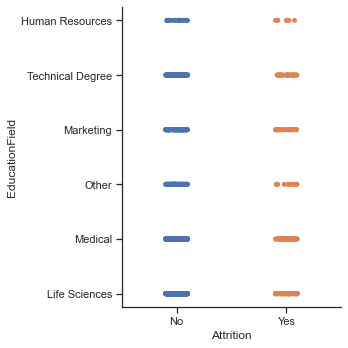

In [29]:
sns.catplot(x = 'Attrition', y = 'EducationField', order = ['No', 'Yes'], data=hr_df)

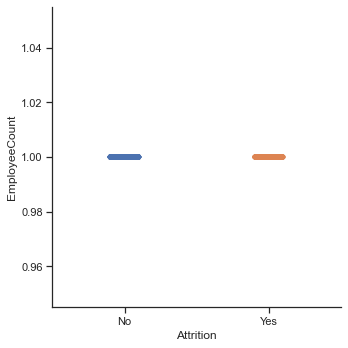

In [30]:
sns.catplot(x = 'Attrition', y = 'EmployeeCount', order = ['No', 'Yes'], data=hr_df)

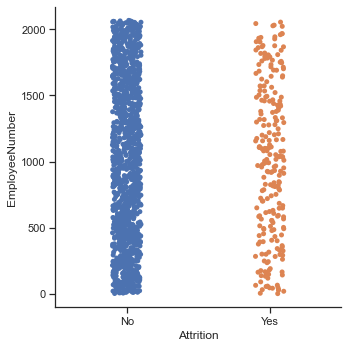

In [31]:
sns.catplot(x = 'Attrition', y = 'EmployeeNumber', order = ['No', 'Yes'], data=hr_df)

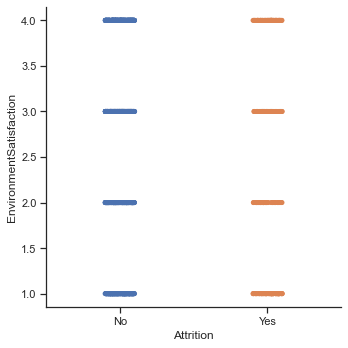

In [32]:
sns.catplot(x = 'Attrition', y = 'EnvironmentSatisfaction', order = ['No', 'Yes'], data=hr_df)

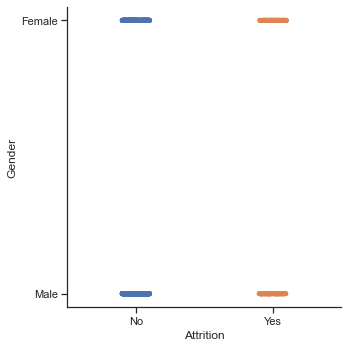

In [33]:
sns.catplot(x = 'Attrition', y = 'Gender', order = ['No', 'Yes'], data=hr_df)

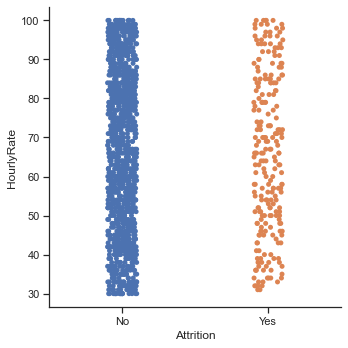

In [34]:
sns.catplot(x = 'Attrition', y = 'HourlyRate', order = ['No', 'Yes'], data=hr_df)

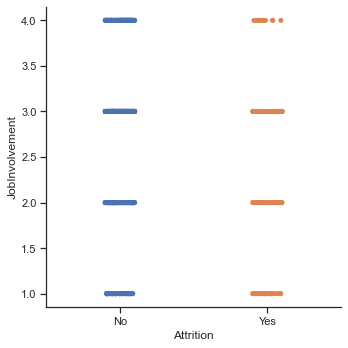

In [35]:
sns.catplot(x = 'Attrition', y = 'JobInvolvement', order = ['No', 'Yes'], data=hr_df)

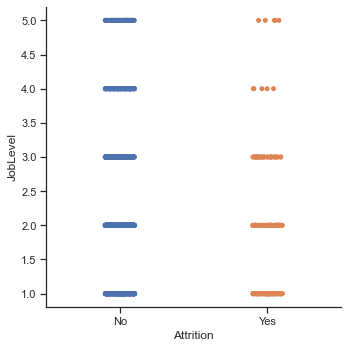

In [36]:
sns.catplot(x = 'Attrition', y = 'JobLevel', order = ['No', 'Yes'], data=hr_df)

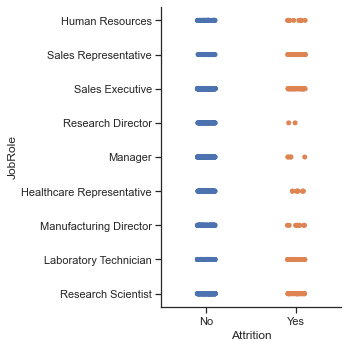

In [37]:
sns.catplot(x = 'Attrition', y = 'JobRole', order = ['No', 'Yes'], data=hr_df)

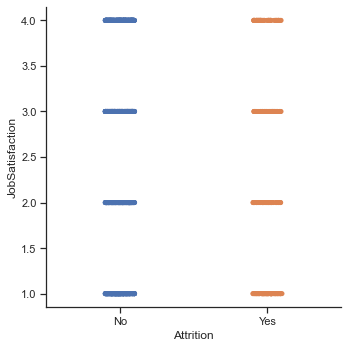

In [38]:
sns.catplot(x = 'Attrition', y = 'JobSatisfaction', order = ['No', 'Yes'], data=hr_df)

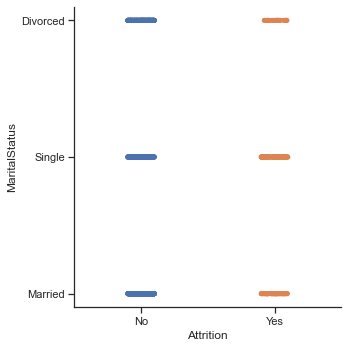

In [39]:
sns.catplot(x = 'Attrition', y = 'MaritalStatus', order = ['No', 'Yes'], data=hr_df)

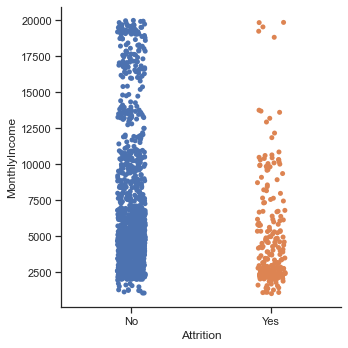

In [40]:
sns.catplot(x = 'Attrition', y = 'MonthlyIncome', order = ['No', 'Yes'], data=hr_df)

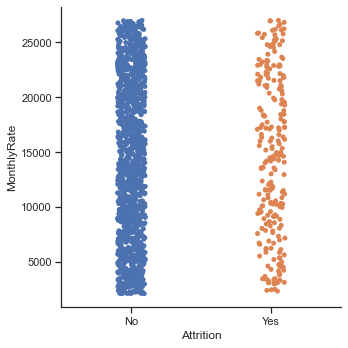

In [41]:
sns.catplot(x = 'Attrition', y = 'MonthlyRate', order = ['No', 'Yes'], data=hr_df)

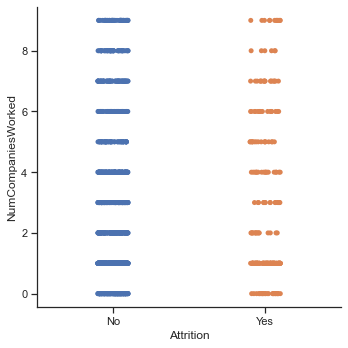

In [42]:
sns.catplot(x = 'Attrition', y = 'NumCompaniesWorked', order = ['No', 'Yes'], data=hr_df)

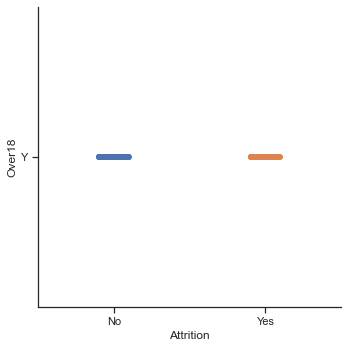

In [43]:
sns.catplot(x = 'Attrition', y = 'Over18', order = ['No', 'Yes'], data=hr_df)

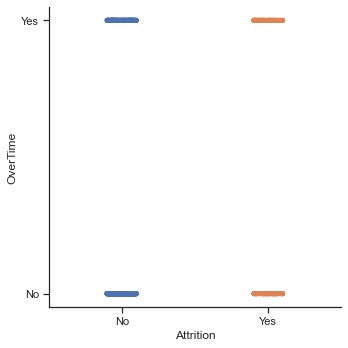

In [44]:
sns.catplot(x = 'Attrition', y = 'OverTime', order = ['No', 'Yes'], data=hr_df)

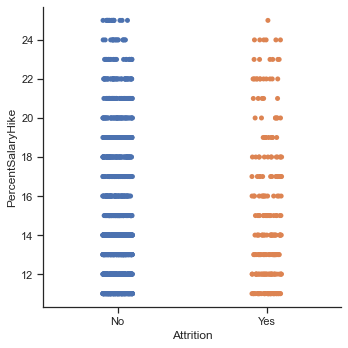

In [45]:
sns.catplot(x = 'Attrition', y = 'PercentSalaryHike', order = ['No', 'Yes'], data=hr_df)

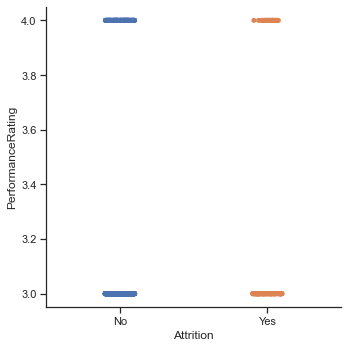

In [46]:
sns.catplot(x = 'Attrition', y = 'PerformanceRating', order = ['No', 'Yes'], data=hr_df)

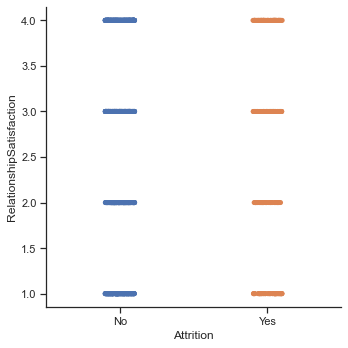

In [47]:
sns.catplot(x = 'Attrition', y = 'RelationshipSatisfaction', order = ['No', 'Yes'], data=hr_df)

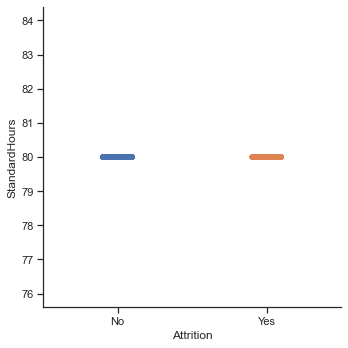

In [48]:
sns.catplot(x = 'Attrition', y = 'StandardHours', order = ['No', 'Yes'], data=hr_df)

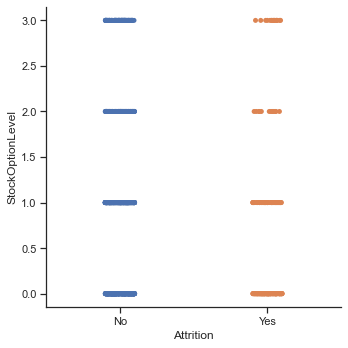

In [49]:
sns.catplot(x = 'Attrition', y = 'StockOptionLevel', order = ['No', 'Yes'], data=hr_df)

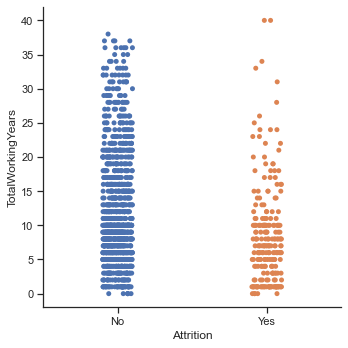

In [50]:
sns.catplot(x = 'Attrition', y = 'TotalWorkingYears', order = ['No', 'Yes'], data=hr_df)

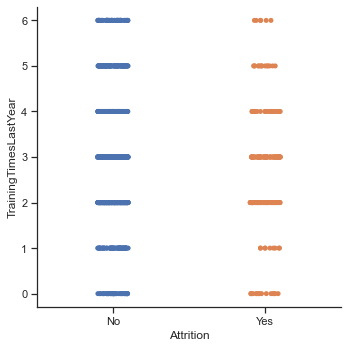

In [51]:
sns.catplot(x = 'Attrition', y = 'TrainingTimesLastYear', order = ['No', 'Yes'], data=hr_df)

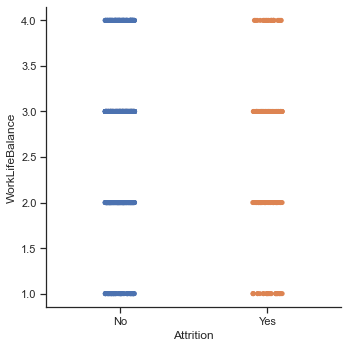

In [52]:
sns.catplot(x = 'Attrition', y = 'WorkLifeBalance', order = ['No', 'Yes'], data=hr_df)

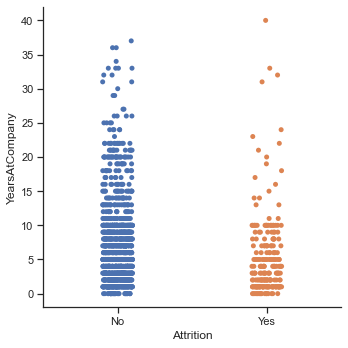

In [53]:
sns.catplot(x = 'Attrition', y = 'YearsAtCompany', order = ['No', 'Yes'], data=hr_df)

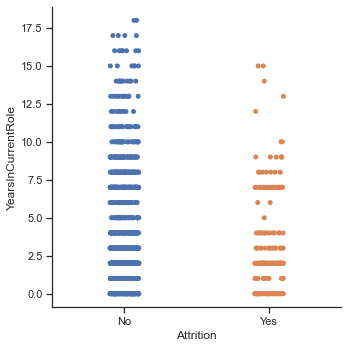

In [56]:
sns.catplot(x = 'Attrition', y = 'YearsInCurrentRole', order = ['No', 'Yes'], data=hr_df)

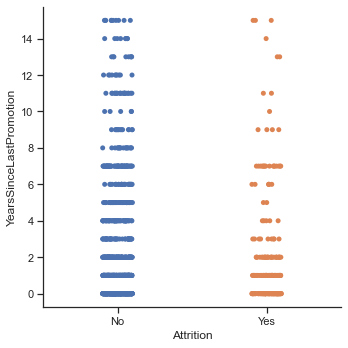

In [55]:
sns.catplot(x = 'Attrition', y = 'YearsSinceLastPromotion', order = ['No', 'Yes'], data=hr_df)

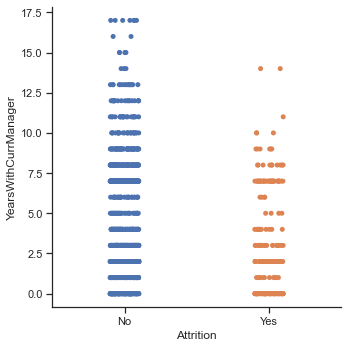

In [54]:
sns.catplot(x = 'Attrition', y = 'YearsWithCurrManager', order = ['No', 'Yes'], data=hr_df)

### Transform Phase
- One hot encoding
- Reduction/Scaling


In [15]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
#generate categorical variable list
hr_cat = hr_df.dtypes[hr_df.dtypes == "object"].index.tolist()

# check unique values
hr_df[hr_cat].nunique()

enc = OneHotEncoder(sparse=False)

#fit/transform
hr_encode = pd.DataFrame(enc.fit_transform(hr_df[hr_cat]))

# add names to df
hr_encode.columns = enc.get_feature_names(hr_cat)

# look at it
hr_encode.head()

C:\Users\melet\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [16]:
# merge/drop originals

hr_df = hr_df.merge(hr_encode, left_index=True, right_index=True)
hr_df = hr_df.drop(hr_cat, 1)

hr_df.head()

C:\Users\melet\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [17]:
hr_df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_No',
       'Attrition_Yes', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gen

In [30]:
# split data into feature/target
y = hr_df['Attrition_Yes'].values
X = hr_df.drop(['Attrition_Yes', 'Attrition_No'], 1)

C:\Users\melet\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
# Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [32]:
# Reduction/Scaling
# scaling
from sklearn.preprocessing import StandardScaler ##?? MIN MAX SCALER?
# Create instance
scaler = StandardScaler()

# Fit 
X_scaler = scaler.fit(X_train)

# Scale 
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Logistical Regression




### Build Model



In [40]:
# Import
from sklearn.linear_model import LogisticRegression

# create model
classifier = LogisticRegression()

# fit model
classifier.fit(X_train, y_train)

# validate model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

# create predictions
LR_pred = classifier.predict(X_test)


## Warning:
# STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
# Increase the number of iterations (max_iter) or scale the data as shown in:
#     https://scikit-learn.org/stable/modules/preprocessing.html
# Please also refer to the documentation for alternative solver options:
#     https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
#   extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,

Training Data Score: 0.8348457350272233
Testing Data Score: 0.8695652173913043


C:\Users\melet\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



### Assess classification model accuracy
- Confusion Matrix


In [41]:
balanced_accuracy_score(y_test, y_pred)

LR_CM = confusion_matrix(y_test, y_pred)

LR_cm_df = pd.DataFrame(
    LR_CM
    , index=['Actual_high_risk', 'Actual_low_risk'], columns=['Predicted_high_risk', 'Predicted_low_risk']
)

LR_cm_df.head()


,Predicted_high_risk,Predicted_low_risk
Actual_high_risk,250,71
Actual_low_risk,18,29


In [43]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

# List the features sorted in descending order by feature importance - Not an option for Log regression
# features_rank_LR = sorted(zip(classifier.feature_importances_, X.columns), reverse=True)
# for feature in features_rank_LR:
#     print(f'{feature[1]}: ({feature[0]})')

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.93      0.78      0.62      0.85      0.69      0.49       321
        1.0       0.29      0.62      0.78      0.39      0.69      0.47        47

avg / total       0.85      0.76      0.64      0.79      0.69      0.49       368




### Hyper parameter tuning
- Grid search
- Random search



### Apply tuned parameters to models



### Test Models
- Assess classification model accuracy
- Choose best performing model



## Random Forest



### Build Model



In [58]:
# Random Forest Model
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

# Fit
brf.fit(X_train, y_train)


BalancedRandomForestClassifier(random_state=1)


### Assess classification model accuracy
- Confusion Matrix


In [59]:
# Calculated the balanced accuracy score
y_pred = brf.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm
    , index=['Actual_high_risk', 'Actual_low_risk'], columns=['Predicted_high_risk', 'Predicted_low_risk']
)


# Print the imbalanced classification report

print(classification_report_imbalanced(y_test, y_pred))

# List the features sorted in descending order by feature importance
features_rank = sorted(zip(brf.feature_importances_, X.columns), reverse=True)
for feature in features_rank:
    print(f'{feature[1]}: ({feature[0]})')
    
cm_df.head()

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.93      0.78      0.62      0.85      0.69      0.49       321
        1.0       0.29      0.62      0.78      0.39      0.69      0.47        47

avg / total       0.85      0.76      0.64      0.79      0.69      0.49       368

MonthlyIncome: (0.07415528139785622)
Age: (0.057179254227513784)
YearsAtCompany: (0.054404733448090645)
TotalWorkingYears: (0.047020226232694716)
HourlyRate: (0.04095374932145764)
EmployeeNumber: (0.040561601692269154)
YearsWithCurrManager: (0.04048281089207008)
MonthlyRate: (0.04021285439718601)
DailyRate: (0.040200853147882104)
OverTime_Yes: (0.03491554735325536)
DistanceFromHome: (0.03442070541448051)
PercentSalaryHike: (0.03239182308882963)
YearsInCurrentRole: (0.030866929881305284)
NumCompaniesWorked: (0.030311256220096564)
OverTime_No: (0.02992805545493613)
JobLevel: (0.02927815776486312)
EnvironmentSatisfaction: (0.02749666313965444)
StockOptionLevel

,Predicted_high_risk,Predicted_low_risk
Actual_high_risk,250,71
Actual_low_risk,18,29



### Hyper parameter tuning
- Grid search
- Random search



### Apply tuned parameters to models



### Test Models
- Assess classification model accuracy
- Choose best performing model



## Support Vector Machine



### Build Model




### Assess classification model accuracy
- Confusion Matrix



### Hyper parameter tuning
- Grid search
- Random search



### Apply tuned parameters to models



### Test Models
- Assess classification model accuracy
- Choose best performing model



## XGBoost



### Build Model




### Assess classification model accuracy
- Confusion Matrix



### Hyper parameter tuning
- Grid search
- Random search



### Apply tuned parameters to models



### Test Models
- Assess classification model accuracy
- Choose best performing model



## Naive Bayes



### Build Model




### Assess classification model accuracy
- Confusion Matrix



### Hyper parameter tuning
- Grid search
- Random search



### Apply tuned parameters to models



## Test Models
- Assess classification model accuracy
- Choose best performing model



### Finalize Model